In [2]:
from causalsim import *
import metrics
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import uniform

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


In [3]:
def run_experiment(learners, data_str, num_sim):

    '''n = n  # Number of individuals
    p = p     # Number of covariates
    beta = beta  # Beta_1 value for treatment effect
    sigma = sigma # Sigma value for noise term'''

    metrics_result = {}
    for learner in learners:
            metrics_result[learner] = {'mse': [], 'bias': [], 'r2': []}
        
    
    for i in range(num_sim):
        data = eval(data_str)
        tau = np.array(data['tau'])

        for learner in learners:
            tau_hat = eval(learners[learner])
            metric_i = metrics.evaluate(tau, tau_hat)

            if metric_i[0] < -50 or metric_i[0] > 50:
                continue
                
            metrics_result[learner]['mse'].append(metric_i[0])
            metrics_result[learner]['bias'].append(metric_i[1])
            metrics_result[learner]['r2'].append(metric_i[2])
            
        
    
    return metrics_result

In [4]:
def plot_metric(metric_name, res, title_label, xlabel, log = True):
    # Get the models from the inner dictionary of one sample size (assuming they're consistent)
    models = list(next(iter(res.values())).keys())
    
    # Get the sample sizes (the outer dictionary keys)
    sample_sizes = list(res.keys())
    
    plt.figure(figsize=(8, 6))  # Set the figure size

    # Loop through each model and plot the metric for that model across sample sizes
    for model in models:
        metric_values = []
        
        for n in sample_sizes:
            # Extract the metric values for the current model and sample size
            metric_values.append(np.mean(res[n][model][metric_name]))  # Taking the mean of the list

        #print(model, metric_values)
        # Plot each model's metrics against the sample sizes
        print(model, metric_values)
        plt.plot(sample_sizes, metric_values, label=model, marker='o')
    
    # Labeling the plot
    plt.title(f'{metric_name.upper()} vs {title_label}')
    plt.xlabel(f'{xlabel}')
    plt.ylabel(f'{metric_name.upper()}')
    plt.legend(title='Model')
    plt.grid(True)
    if log:
        plt.xscale('log')  # Optional: Log scale if N varies greatly
    plt.show()

In [5]:
res = {}
for n in [10000,50000,100000]:
    p = 20
    learners = {"LR" : "Causal_LR(data)", "X" : "Causal_XLearner(data, LinearRegression())", 
                "DR" : "Causal_DRLearner(data)", "CF" : "Causal_CausalForest(data)",
                "T" : "Causal_TLearner(data, LinearRegression())" , "S" : "Causal_SLearner(data, LinearRegression())"}
    data_str = f"simulation_XLearner_1({n}, {p})"
    res[n] = run_experiment(learners, data_str, 3)

LR [18.268128982857807, 16.155613656488672, 16.34246604513415]
X [7.639879023649012, 6.22210877112479, 6.036745107575392]
DR [10.44436952406563, 6.802866535398418, 6.247568455162853]
CF [15.874836531635085, 4.102285153776838, 2.1477890023727695]
T [7.639879023649015, 6.222108771124791, 6.036745107575393]
S [16.337221744478565, 15.941736806469534, 15.901829438426475]


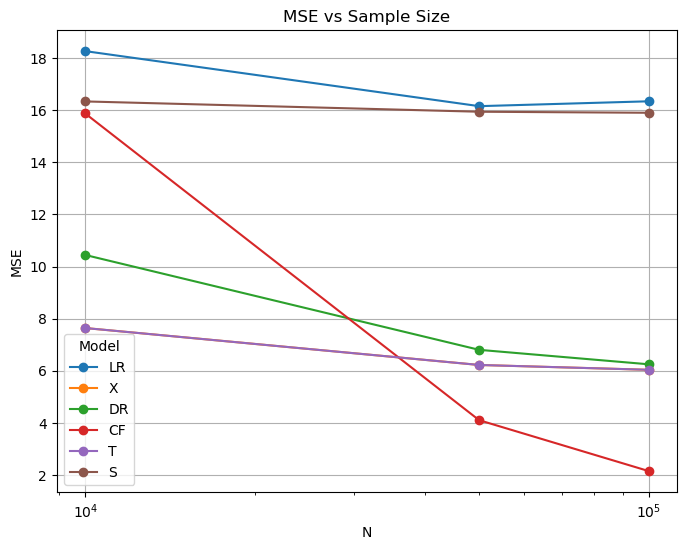

LR [-0.0043597840281465365, -0.2905423445926834, -0.05641120269387976]
X [0.06601150934256664, 0.10790040938831234, -0.10485448618665556]
DR [-0.6420131433808135, 0.1349605960352129, -0.06463317744292026]
CF [-0.46516926698011324, 0.23831626491052707, 0.12780823740920355]
T [0.06601150934256265, 0.10790040938831273, -0.10485448618665448]
S [-0.6464783369125963, 0.13581489915811426, -0.06341177541964704]


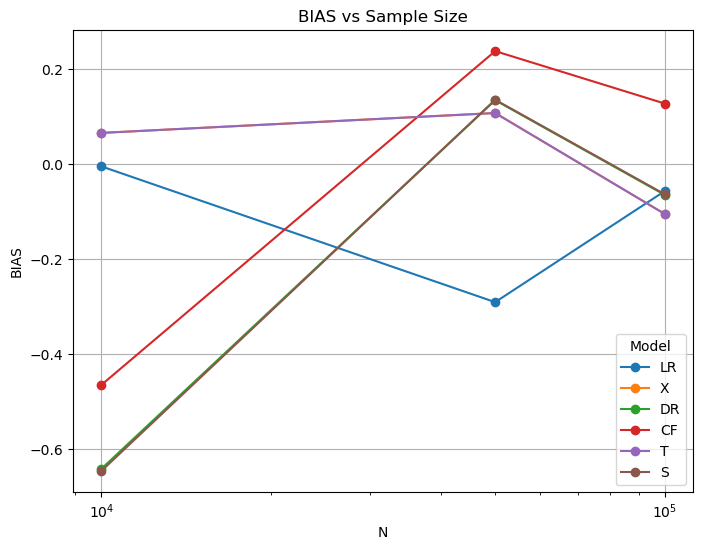

LR [-0.1491587630358091, -0.015514537755628574, -0.02810250275788177]
X [0.5194114575047027, 0.6088905152893376, 0.6202288584693558]
DR [0.3429739850760438, 0.5723820072915599, 0.6069658925987101]
CF [0.0013984839763897527, 0.742133798469697, 0.8648822837724577]
T [0.5194114575047025, 0.6088905152893376, 0.6202288584693558]
S [-0.027713084096051627, -0.002067787011232299, -0.0003847729744313651]


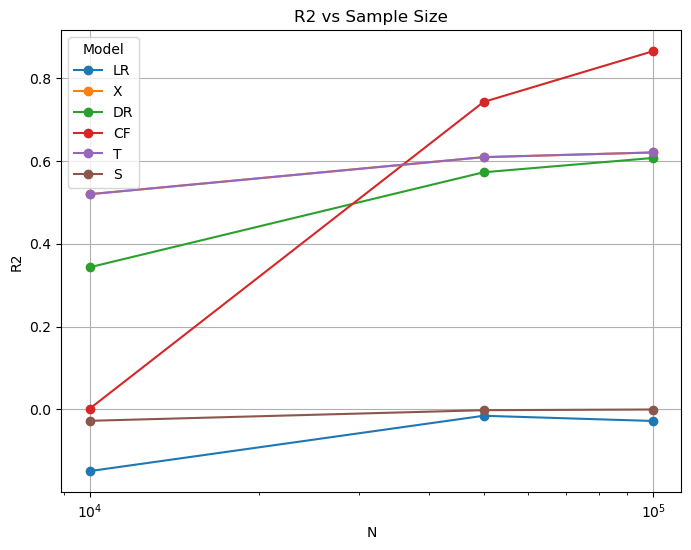

In [6]:
# Call the function for each metric
for metric in ['mse', 'bias', 'r2']:
    plot_metric(metric, res, "Sample Size", "N")